In [1]:
# p53
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
# 데이터 적재
oecd_bli = pd.read_csv('C:/Users/대현/Desktop/python-RE-/핸즈온/1_data/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('C:/Users/대현/Desktop/python-RE-/핸즈온/1_data/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]] # c_ 배열을 세로로 붙이기
y = np.c_[country_stats["Life satisfaction"]]
print(X);print("================="); print(y)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]
[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]
 [5.6]
 [4.8]
 [5.1]
 [5.7]
 [6.5]
 [5.8]
 [6. ]
 [5.9]
 [7.4]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.4]
 [7.3]
 [7.3]
 [6.9]
 [6.8]
 [7.2]
 [7.5]
 [7.3]
 [7. ]
 [7.5]
 [7.2]]


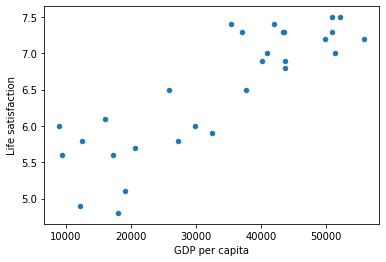

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[5.96242338]]


In [4]:
# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y = "Life satisfaction")
plt.show()

# 선형 모델 선택
model =  sklearn.linear_model.LinearRegression()

# 모델 훈련
print(model.fit(X, y))

# 키포로스에 대한 예측
X_new = [[22587]] # 키포로스 1인당 GDP
print(model.predict(X_new))

# 1장 연습문제

# 1. 머신러닝을 어떻게 정의할 수 있나요?
-> 데이터로부터 학습할 수 있는 시스템을 만드는 것. 학습이란 어떤 작업에서 주어진 성능 지표가 더 나아지는 것을 의미.

# 2. 머신러닝이 도움을 줄 수 있는 문제 유형 네 가지를 말해보세요.
-> 명확히 해결책이 없는 복잡한 문제, 수작업으로 만든 긴 규칙 리스트를 대체하는 경우, 
변화하는 환경에 적응하는 시스템을 만드는 경우,사람에게 통찰을 제공해야 하는 경우(ex 데이터 마이닝)

# 3. 레이블된 훈련 세트란 무엇인가요?
-> 각 샘플에 대해 원하는 정답(레이블)을 담고 있는 훈련 세트

# 4. 가장 널리 사용되는 지도 학습 작업 두 가지는 무엇인가요?
-> 회귀 & 분류

# 5. 보편적인 비지도 학습 작업 네 가지는 무엇인가요?
-> 군집, 시각화, 차원 축소, 연관 규칙 학습

# 6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나요?
-> 강화 학습, 지도 학습이나 비지도 학습으로 표현하는 것도 가능하지만 일반적이지 않다.

# 7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나요?
-> 그룹을 어떻게 정의할지 모르면 비슷한 고객끼리 군집으로 나누기 위해 군집 알고리즘(비지도학습)을 사용할 수 있다. 
그러나 어떤 그룹이 있어야 할지 안다면 분류 알고리즘(지도 학습)에 각 그룹에 대한 샘플을 주입한다. 그러면 알고리즘이 전체 고객을
이런 그룹으로 분류하게 될 것이다.

# 8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있나요? 
-> 지도학습

# 9. 온라인 학습 시스템이 무엇인가요?
-> 배치 학습 시스템과 달리 점진적으로 학습할 수 있다. 이 방식은 변화하는 데이터와 자율 시스템에 빠르게 적응하고 매우 많은 양의 
데이터를 훈련시킬 수 있다.

# 10. 외부 메모리 학습이 무엇인가요?
-> 대용량의 데이터를 다룰 수 있다. 데이터를 미니배치로 나누고 온라인 학습 기법을 사용해 학습한다.

# 11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 무엇인가요? 
-> 사례(인스턴스) 기반 학습 시스템은 훈련 데이터를 기억하는 학습이다. 새로운 샘플이 주어지면 유사도 측정을 사용해 학습된 샘플 중에서 가장 비슷한 것을 찾아 예측으로 사용한다.

# 12. 모델 파라미터와 학습 알고리즘의 하이퍼파라미터 사이에는 어떤 차이가 있나요?
-> 하이퍼파라미터(적용할 규제의 정도)는 모델 학습 전에 미리 지정해야 하는 학습 알고리즘이 자체적으로 가지고 있는 파라미터이다. 만들어진 모델의 파라미터를 모델 파라미터(선형 모델의 기울기)라고 한다.

# 13. 모델 기반 알고리즘이 찾는 것은 무엇인가요? 
# 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가요? 
# 예측은 어떻게 만드나요?
-> 모델 기반 학습 알고리즘은 새로운 샘플에 잘 일반화되귀 위한 모델 파라미터의 최적값을 찾는다. 일반적으로 훈련 데이터에서 시스템의 예측이 얼마나 나쁜지 측정하고 모델에 규제가 있다면 모델 복잡도에 대한 패널티를 더한 비용 함수를 최소화함으로써 시스템을 훈련시킨다. 예측을 만들려면 학습 알고리즘이 찾은 파라미터를 사용하는 모델의 예측 함수에 새로운 샘플의 특성을 주입한다.

# 14. 머신러닝의 주요 도전 과제는 무엇인가요?
-> 부족한 데이터, 낮은 데이터 품질, 대표성 없는 데이터, 무의미한 특성, 훈련 데이터에 과소적합된 과도하게 간단한 모델, 훈련 데이터에 과대적합된 과도하게 복잡한 모델 등이 직면하는 도전 과제이다.

# 15. 모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있는 건가요? 
# 가능한 해결책 세 가지는 무엇인가요?
-> 훈련 데이터에 과대적합 되었을 가능성이 높다.
해결책은 더 많은 데이터 모으기 / 모델을 단순화(단순한 알고리즘 선택, 특성이나 파라미터의 수 줄이기, 모델에 규제를 추가) / 훈련 데이터에 있는 잡음을 감소시키는 것

# 16. 테스트 세트가 무엇이고 왜 사용해야 하나요?
-> 실전에 배치되기 전에 모델이 새로운 샘플에 대해 만들 일반화 오차를 추정하기 위해 사용

# 17. 검증 세트의 목적은 무엇인가요?
-> 모델을 비교하는 데 사용. 이를 사용해 가장 좋은 모델을 고르고 하이퍼파라미터를 튜닝. 다양한 하이퍼파라미터로 여러 모델을 훈련시키고 검증 세트에서 최상의 성능을 내는 모델과 하이퍼파라미터를 선택

# 18. 테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 어떤 문제가 생기나요?
-> 테스트 세트에 과대적합될 위험이 있고, 일반화 오차는 매우 낙관적으로 측정될 것(모델의 성능이 예상보다 나쁠 것)

# 19. 교차 검증이 무엇이고, 왜 하나의 검증 세트보다 선호하나요?
-> 검증 세트를 별도로 분리하지 않고(모델 선택과 하이퍼파라미터 튜닝을 위해) 모델을 비교할 수 있는 기술. 이는 훈련 데이터를 최대한 활용하도록 도와준다.